In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

m = 100

w = np.random.uniform(-1, 1, m)
w/=np.linalg.norm(w)


n = 10
X = np.random.uniform(-1, 1, (n, m))
y = X@w +np.random.normal(0, 0.01, n)



In [4]:
w_min_norm = X.T@np.linalg.solve(X@X.T, y)
print(np.linalg.norm(w_min_norm))
print(np.linalg.norm(X@w_min_norm-y))

0.36913412997522943
6.017265405022454e-16


In [5]:
wr = np.random.uniform(-1, 1, m)
# w0 dans le kern de X.T: 
w0_kern_xt = wr - X.T@np.linalg.solve(X@X.T,X@wr)
print(np.linalg.norm(X@(w_min_norm+w0_kern_xt)-y))

3.246215994617302e-15


In [6]:
w0 = w_min_norm
w0/= np.linalg.norm(w0)

w1 = w0_kern_xt
w1/= np.linalg.norm(w1)


all_trajectories = []
for i in np.arange(-1, 1, 0.1):
    for j in np.arange(-1, 1, 0.1):
        wk = i*w0 +j*w1
        alpha = 0.01
        list_wk = [(wk@w0, wk@w1)]
        for k in range(10):

            loss = np.linalg.norm(y -X@wk)**2
            print(loss)

            grad_k = 2*X.T@X@wk  - 2*X.T@y
            wk -= alpha*grad_k
            list_wk.append((wk@w0, wk@w1))
        all_trajectories.append(list_wk)
        







51.263938310551154
10.357539390797484
2.6034166596385733
0.6963449009719335
0.1954709253622446
0.05741899302001877
0.017612867469609265
0.00562271211748079
0.0018589064830007301
0.0006326787050555046
51.26393831055115
10.357539390797484
2.6034166596385733
0.6963449009719335
0.19547092536224467
0.05741899302001874
0.017612867469609265
0.005622712117480826
0.0018589064830007332
0.0006326787050555068
51.26393831055115
10.357539390797484
2.603416659638574
0.6963449009719339
0.19547092536224456
0.0574189930200188
0.01761286746960924
0.005622712117480772
0.001858906483000727
0.000632678705055496
51.26393831055115
10.357539390797484
2.6034166596385733
0.6963449009719339
0.19547092536224447
0.057418993020018856
0.01761286746960928
0.0056227121174808005
0.0018589064830007457
0.0006326787050555108
51.263938310551154
10.357539390797484
2.6034166596385733
0.6963449009719339
0.19547092536224456
0.05741899302001879
0.017612867469609307
0.005622712117480772
0.0018589064830007254
0.0006326787050554992

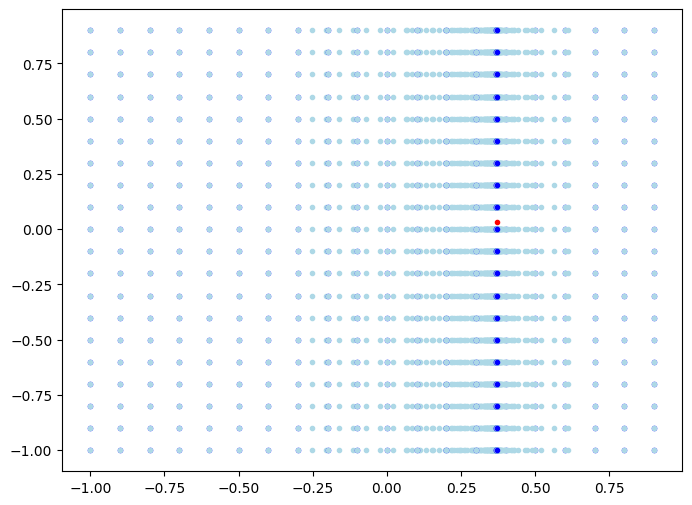

In [7]:

# Visualize steady states
plt.figure(figsize=(8, 6))
# plt.xlim(-4, 4)
# plt.ylim(-4, 4)

eq1 = []
eq2 = []


plt.plot(w0@w, w1@w, '.', color = 'r')

for traj in all_trajectories:
    plt.plot(traj[0][0], traj[0][1], '.', color = "blue")
    for i in range(len(traj)):
        plt.plot(traj[i][0], traj[i][1], '.', color = "lightblue")
    plt.plot(traj[-1][0], traj[-1][1], '.', color = "blue")

    





In [29]:


# 100*1000 1000*1000 1000*1
# y =  X A B 

A = np.random.uniform(-1, 1, (m, m))
# print(A)

all_trajectories = []
for i in np.arange(-1, 1, 0.25):
    for j in np.arange(-1, 1, 0.25):
        Ak = np.copy(A)
        wk = np.linalg.solve(Ak, i*w0 +j*w1)
        alphaw = 0.00001
        alphaA = 0.00001
        list_wk = [(Ak@wk@w0, Ak@wk@w1)]
        for k in range(300):

            loss = np.linalg.norm(y - X@Ak@wk)**2
            print(loss)

            grad_k = 2 * Ak.T @ X.T @ (X @ Ak @ wk - y)
            grad_A =  2 * X.T @ (X @ Ak @ wk - y) @ wk.T
            wk -= alphaw*grad_k
            Ak -= alphaA*grad_A
            
            list_wk.append((Ak@wk@w0, Ak@wk@w1))
        all_trajectories.append(list_wk)






51.26393831055104
49.00653844564352
46.86955857909801
44.84575081215673
42.92833244788738
41.11095504593311
39.387675593644154
37.75292964367941
36.20150627942041
34.728524779858596
33.329412865103116
31.99988641236785
30.735930540326187
29.53378196711443
28.389912554083562
27.30101395368973
26.263983285734255
25.275909771528745
24.334062260539103
23.435877588659803
22.578949711532704
21.761019560271162
20.97996557061765
20.233794839951795
19.520634869724987
18.83872585381712
18.18641347603647
17.56214218250161
16.964448896995897
16.391957149564377
15.843371590652595
15.317472864975185
14.813112821054002
14.329210034004504
13.864745620665374
13.418759327585779
12.990345873699468
12.578651530745107
12.18287092563425
11.802244050033305
11.436053463419695
11.083621676792767
10.744308705088752
10.417509777142223
10.102653192794095
9.799198317437158
9.506633704943178
9.224475340520957
8.95226499562066
8.689568687523497
8.435975236752927
8.191094915893759
7.954558183841437
7.726014499893745


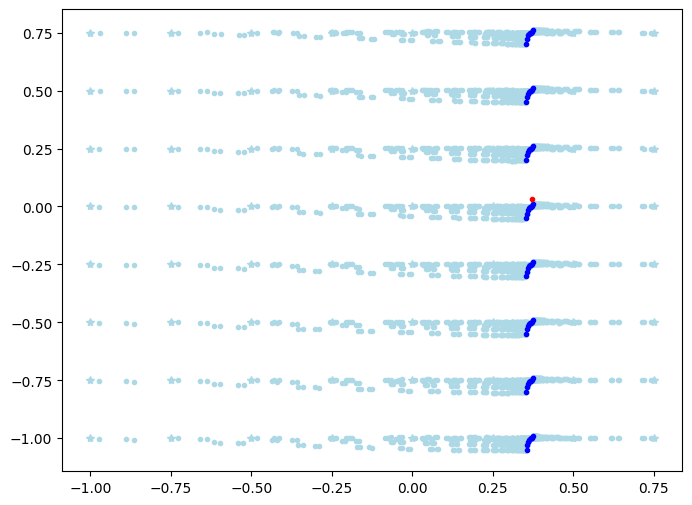

In [30]:

# Visualize steady states
plt.figure(figsize=(8, 6))
# plt.xlim(-4, 4)
# plt.ylim(-4, 4)

eq1 = []
eq2 = []



for traj in all_trajectories:
    for i in range(len(traj)):
        if i&10 ==0:
            plt.plot(traj[i][0], traj[i][1], '.', color = "lightblue")
    plt.plot(traj[0][0], traj[0][1], '*', color = "lightblue")

for traj in all_trajectories:
    plt.plot(traj[-1][0], traj[-1][1], '.', color = "blue")

    
plt.plot(w0@w, w1@w, '.', color = 'r')



